# Project Title - Edit Me


## Data set selection

> In this section, you will need to provide the following information about the selected data set:
>
> - Source with a link
> - Fields
> - License

### Data set selection rationale

> Why did you select this data set?

### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
> This could include questions such as:
>
> - What is the relationship between X and Y variables?
> - What is the distribution of the variables?
> - What is the relationship between the variables and the target?
>   You will need to frame these questions in a way to show value to a stakeholder (i.e.why should we know about the relationship between X and Y variables?)

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.
> Think about what those visualization could be: what are the variables used in the charts? what insights do you hope to gain from them?


In [ ]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project Title - Respiratory Virus Hospital Admissions Analysis

## Data set selection

- **Source:** [Respiratory Virus Hospital Admissions Over Time - data.gov](https://catalog.data.gov/dataset/respiratory-virus-hospital-admissions-over-time)
- **Fields:**
  - `Week_Ending`: Week ending date
  - `Influenza`: Number of influenza hospital admissions
  - `RSV`: Number of RSV hospital admissions
  - `COVID-19`: Number of COVID-19 hospital admissions
  - `Influenza_Rate_per_100k`: Rate per 100,000 people
  - `RSV_Rate_per_100k`: Rate per 100,000 people
  - `COVID19_Rate_per_100k`: Rate per 100,000 people
- **License:** Public domain (government data)

### Data set selection rationale

I selected this dataset because I am interested in exploring how different respiratory viruses impact hospital admissions over time in San Francisco. By analyzing weekly trends, rates, and comparisons between Influenza, RSV, and COVID-19, I can gain insights into seasonal patterns, peak periods, and the relative burden of each virus on hospitals. This information can help stakeholders like public health officials understand hospital demand and plan resource allocation.

### Questions to be answered

1. How have weekly hospital admissions for each virus changed over time? Are there seasonal trends or peaks?
2. How do the rates of hospital admissions per 100,000 people compare between Influenza, RSV, and COVID-19?
3. Which virus contributes the most to hospital admissions during peak periods?
4. Are there periods where multiple viruses peak at the same time?
5. How do total admissions change year over year?

### Visualization ideas

1. **Line chart** showing weekly hospital admissions for Influenza, RSV, and COVID-19 — to visualize trends over time.
2. **Line chart** showing weekly admission rates per 100,000 people — to compare the relative burden standardized by population.
3. **Stacked area chart** showing combined weekly admissions — to see total hospital load and each virus's contribution.
4. **Bar chart** showing yearly total admissions per virus — to summarize overall burden by year.
5. **Box plot** of weekly rates per virus — to show distribution and identify outliers.
6. **Interactive Plotly chart** of weekly admissions — to allow dynamic exploration of trends.


In [ ]:
# 🚀 Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# Load the dataset from Desktop
df = pd.read_csv(
    '/Users/samarpangurung/Desktop/Respiratory_Virus_Hospital_Admissions_Over_Time.csv')

# Preview the data
df.head()

# Check column info
df.info()

# Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   week_start_date          168 non-null    object 
 1   week_end_date            168 non-null    object 
 2   epi_week                 168 non-null    int64  
 3   respiratory_virus        168 non-null    object 
 4   new_admissions           168 non-null    int64  
 5   admission_rate_per_100k  168 non-null    float64
 6   sf_population_estimate   168 non-null    int64  
 7   data_updated_at          168 non-null    object 
 8   data_as_of               168 non-null    object 
 9   data_loaded_at           168 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 13.3+ KB


,epi_week,new_admissions,admission_rate_per_100k,sf_population_estimate
count,168.000000,168.000000,168.000000,168.0
mean,27.714286,15.095238,1.805357,836321.0
std,15.158699,21.785904,2.604697,0.0
min,1.000000,0.000000,0.000000,836321.0
25%,14.750000,1.000000,0.120000,836321.0
50%,28.500000,8.000000,0.960000,836321.0
75%,42.000000,19.000000,2.270000,836321.0
max,52.000000,119.000000,14.230000,836321.0


Index(['week_start_date', 'week_end_date', 'epi_week', 'respiratory_virus',
       'new_admissions', 'admission_rate_per_100k', 'sf_population_estimate',
       'data_updated_at', 'data_as_of', 'data_loaded_at'],
      dtype='object')


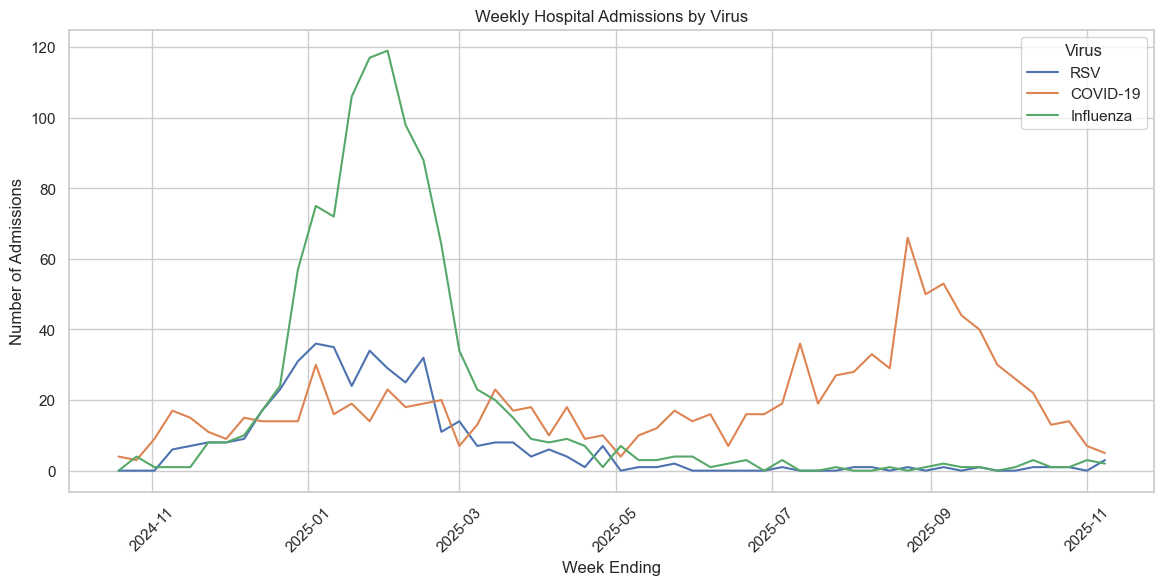

In [ ]:
# Convert 'week_end_date' to datetime
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Check column names to confirm
print(df.columns)

# Line chart: Weekly hospital admissions by virus
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='week_end_date',
             y='new_admissions', hue='respiratory_virus')
plt.xticks(rotation=45)
plt.title('Weekly Hospital Admissions by Virus')
plt.xlabel('Week Ending')
plt.ylabel('Number of Admissions')
plt.legend(title='Virus')
plt.show()

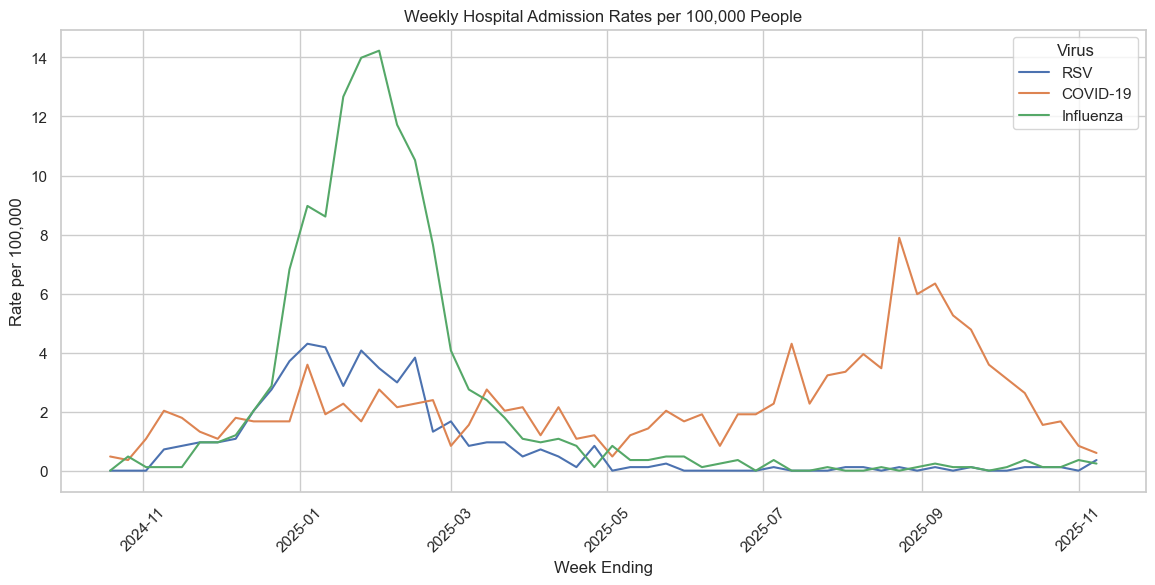

In [ ]:
# Convert 'week_end_date' to datetime
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Line chart: Weekly admission rates per 100,000 people
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='week_end_date',
             y='admission_rate_per_100k', hue='respiratory_virus')
plt.xticks(rotation=45)
plt.title('Weekly Hospital Admission Rates per 100,000 People')
plt.xlabel('Week Ending')
plt.ylabel('Rate per 100,000')
plt.legend(title='Virus')
plt.show()

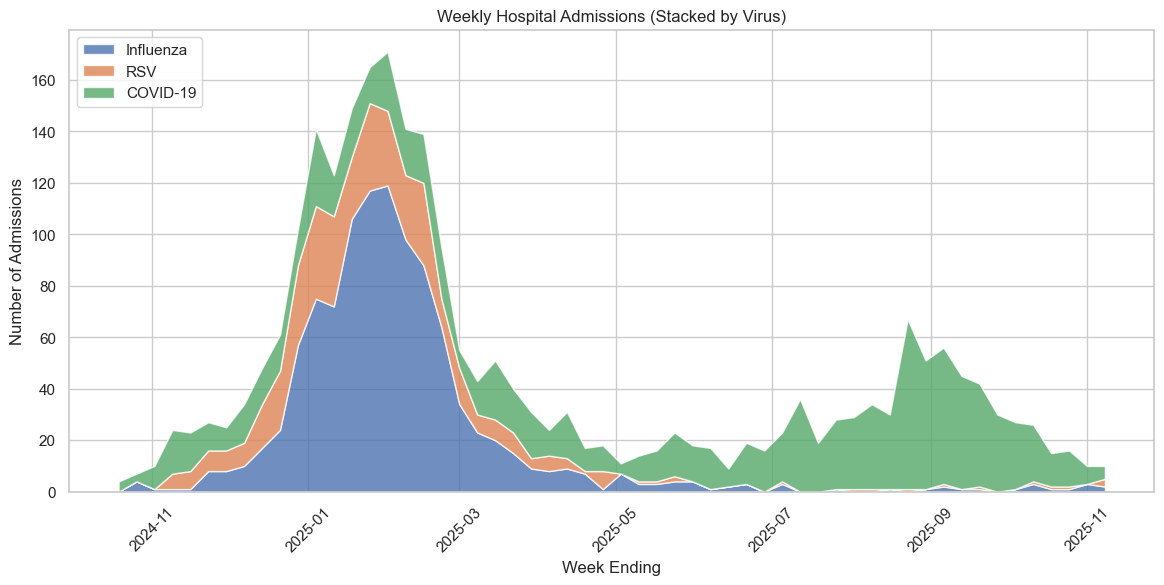

In [ ]:
# Convert 'week_end_date' to datetime
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Pivot the data so each virus has its own column
df_pivot = df.pivot(index='week_end_date',
                    columns='respiratory_virus', values='new_admissions').fillna(0)

# Stacked area chart
plt.figure(figsize=(14, 6))
plt.stackplot(df_pivot.index,
              df_pivot.get('Influenza', 0),
              df_pivot.get('RSV', 0),
              df_pivot.get('COVID-19', 0),
              labels=['Influenza', 'RSV', 'COVID-19'], alpha=0.8)
plt.xticks(rotation=45)
plt.title('Weekly Hospital Admissions (Stacked by Virus)')
plt.xlabel('Week Ending')
plt.ylabel('Number of Admissions')
plt.legend(loc='upper left')
plt.show()

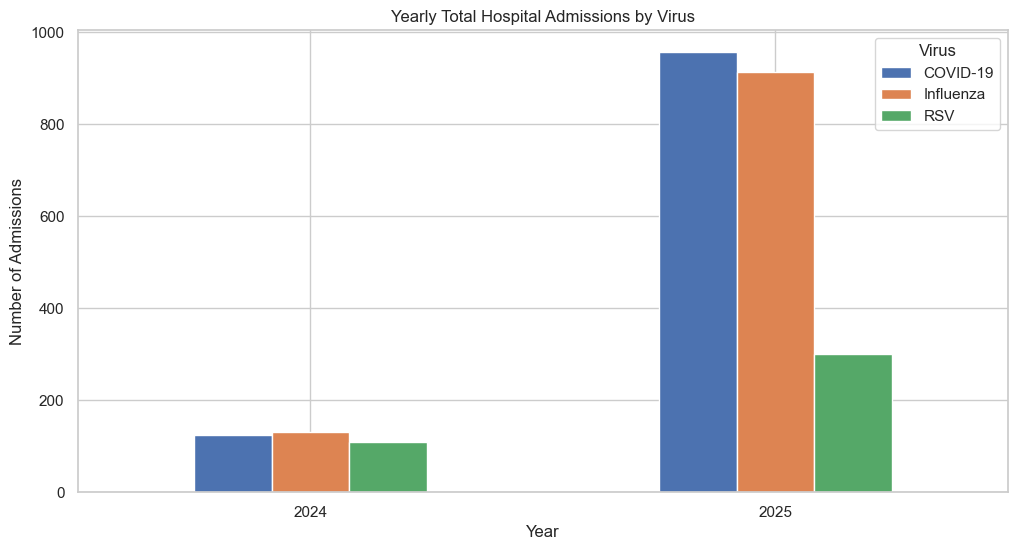

In [ ]:
# Convert 'week_end_date' to datetime if not already done
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Extract year
df['Year'] = df['week_end_date'].dt.year

# Group by Year and Virus, sum admissions
yearly_totals = df.groupby(['Year', 'respiratory_virus'])[
    'new_admissions'].sum().unstack().fillna(0)

# Plot
yearly_totals.plot(kind='bar', figsize=(12, 6))
plt.title('Yearly Total Hospital Admissions by Virus')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)
plt.legend(title='Virus')
plt.show()

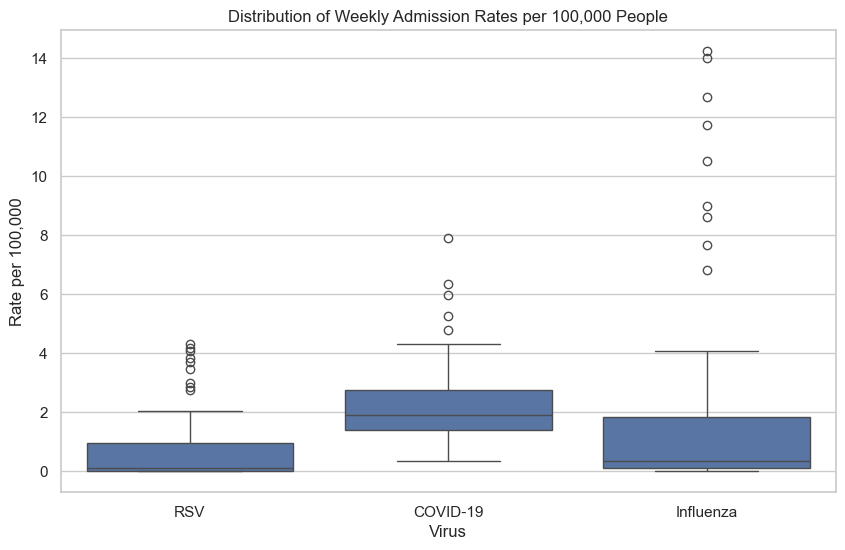

In [ ]:
# Box plot: Weekly admission rates per virus
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='respiratory_virus', y='admission_rate_per_100k')
plt.title('Distribution of Weekly Admission Rates per 100,000 People')
plt.xlabel('Virus')
plt.ylabel('Rate per 100,000')
plt.show()

In [ ]:
import plotly.express as px

# Convert 'week_end_date' to datetime if not already done
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

# Interactive Plotly line chart
fig = px.line(df,
              x='week_end_date',
              y='new_admissions',
              color='respiratory_virus',
              title='Interactive Weekly Hospital Admissions by Virus',
              labels={
                  'week_end_date': 'Week Ending',
                  'new_admissions': 'Number of Admissions',
                  'respiratory_virus': 'Virus'
              })
fig.show()